In [1]:
#import neccecary libaries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression

In [2]:
# Lets import our data frame
df = pd.read_csv("/home/icaarus/Desktop/housing_predictions/heart.csv",index_col=None)

### Data Preprocessing

In [3]:
#lets see how our data frame looks
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# See some important numerical data from the data set 
print(df.columns)
print(df.shape)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
(1025, 14)


In [5]:
# lets rename our columns 
column_names = ['age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'] 
for i in range(len(column_names)):
    column_names[i] = column_names[i].capitalize()
df.columns = column_names

## Feature Engineering

### Creating Features 

In [6]:
df['Healthy_Trestbps'] = df['Trestbps'][df['Trestbps'] < 120]
df['Elevated_Trestbps'] = df['Trestbps'][(df['Trestbps'] > 120) & (df['Trestbps'] < 129)] 
df['Stage_1_Hypertension'] = df['Trestbps'][(df['Trestbps'] > 130) & (df['Trestbps'] < 139)]
df['Stage_2_Hypertension'] = df['Trestbps'][(df['Trestbps'] > 140) & (df['Trestbps'] < 180)]

In [7]:
df['Age_Chol'] = df['Age'] * df['Chol'].astype(int)
df['Age_Thalach'] = df['Age'] * df['Thalach']
df['Age_Trestbps'] = df['Age'] * df['Trestbps']

In [8]:
df['Normal_Chol'] = df['Chol'][df['Chol'] < 200]
df['Borderline_High_Chol'] = df['Chol'][(df['Chol'] > 200) & (df['Chol'] < 239)]
df['High_Chol'] = df['Chol'][(df['Chol'] > 240)]

In [9]:
df['Normal_Chol'] = df['Normal_Chol'].fillna(df['Normal_Chol'].mean())
df['Borderline_High_Chol'] = df['Borderline_High_Chol'].fillna(df['Borderline_High_Chol'].mean())
df['High_Chol'] = df['High_Chol'].fillna(df['High_Chol'].mean())

In [10]:
df['Healthy_Trestbps'] = df['Healthy_Trestbps'].fillna(df['Healthy_Trestbps'].mean())
df['Elevated_Trestbps'] = df['Elevated_Trestbps'].fillna(df['Elevated_Trestbps'].mean())
df['Stage_1_Hypertension'] = df['Stage_1_Hypertension'].fillna(df['Stage_1_Hypertension'].mean())
df['Stage_2_Hypertension'] = df['Stage_2_Hypertension'].fillna(df['Stage_2_Hypertension'].mean())

### Feature understanding using mutual information regression

In [11]:
X = df.drop(columns='Target',axis=1)
y = df['Target']
discrete_values = X.dtypes == int

In [12]:
 def mi_scores(X,y,Discrete_variable='auto'):
    mi_score = mutual_info_regression(X,y,discrete_features=Discrete_variable)
    mi_score = pd.Series(mi_score,index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score
mi_score = mi_scores(X,y,discrete_values)
mi_score_df = mi_score.to_frame()

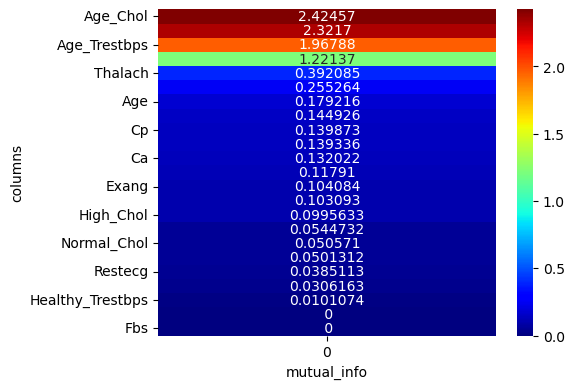

In [13]:
ns.heatmap(m# lets make a heatmap
plt.figure(figsize=(6,4))
si_score_df,annot=True,fmt='2g',cmap='jet')
plt.xlabel('mutual_info')
plt.ylabel('columns')
plt.tight_layout()
plt.show()

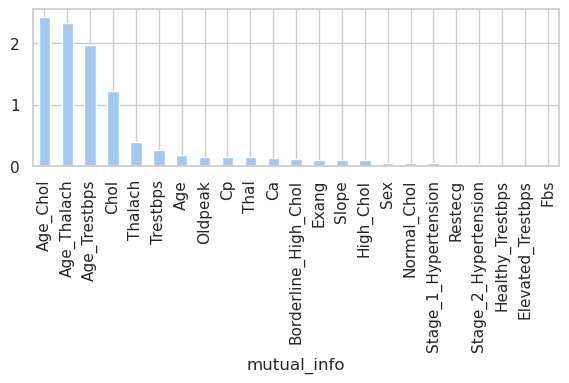

In [14]:
# for better visulization
sns.set(style='whitegrid',palette='pastel')
plt.figure(figsize=(6,4))
mi_score.plot(kind='bar')
plt.xlabel('mutual_info')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

### Numerical Analysis 

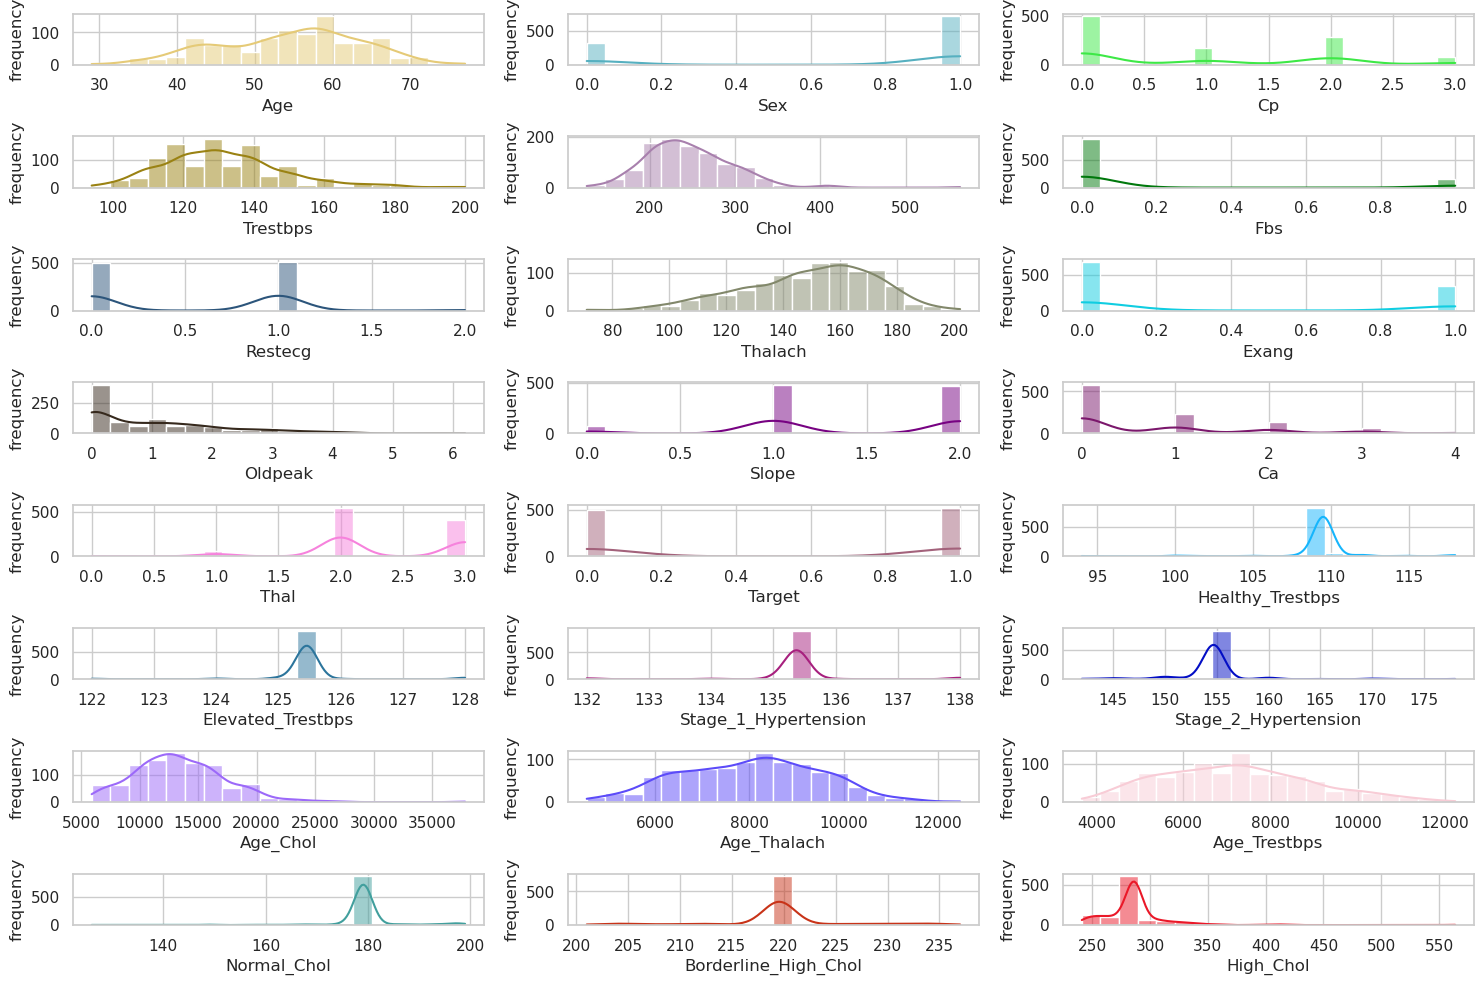

In [15]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
num_plots = len(numerical_columns)

cols = 3
rows = (num_plots // cols) + (num_plots % cols)

fig, axes = plt.subplots(rows,cols,figsize=(15,10))
axes = axes.flatten()

for i,column in enumerate(numerical_columns):
    color = np.random.rand(3,)
    sns.histplot(data=df,x=column,kde=True,ax=axes[i],color=color,bins=20)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

### Pair plots

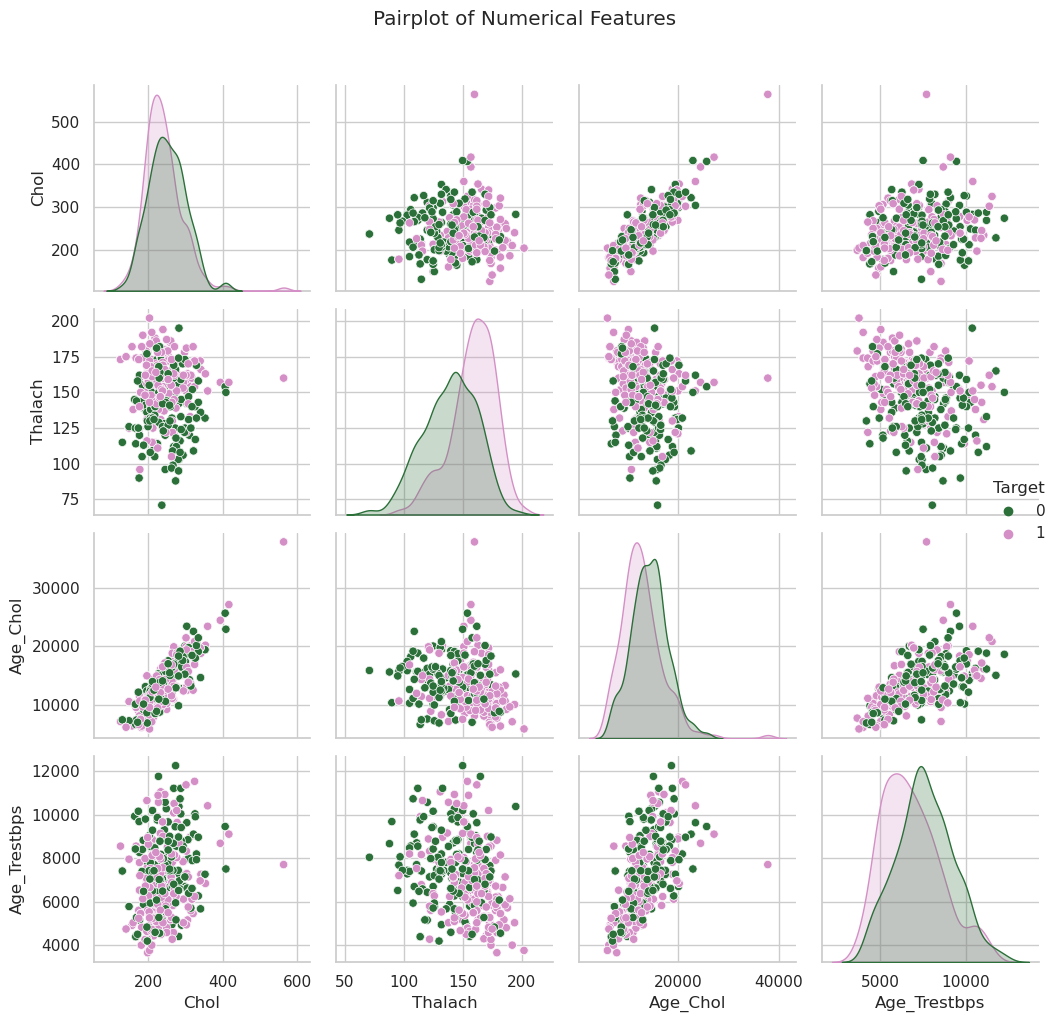

In [16]:
features_to_plots = ['Chol','Thalach','Age_Chol','Age_Trestbps','Target']
sns.pairplot(data=df[features_to_plots],hue='Target',diag_kind='kde',palette='cubehelix')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()


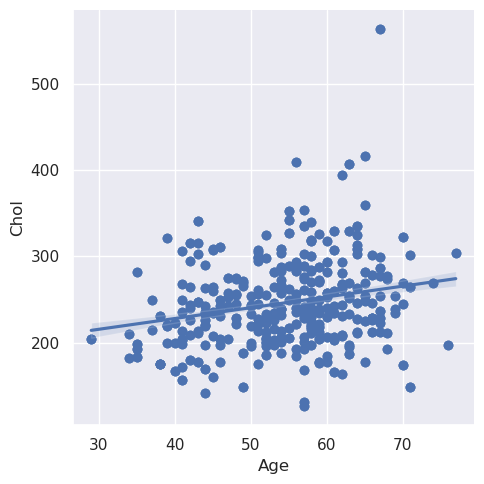

In [17]:
sns.set(palette='deep')
plt.Figure(figsize=(8,6))
sns.lmplot(x= 'Age', y='Chol',data=df)
plt.tight_layout()
plt.show()


## Train Validation Split And Scaling 

In [30]:
# Import the necesary libaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
100 100
80

<Axes: ylabel='Count'>

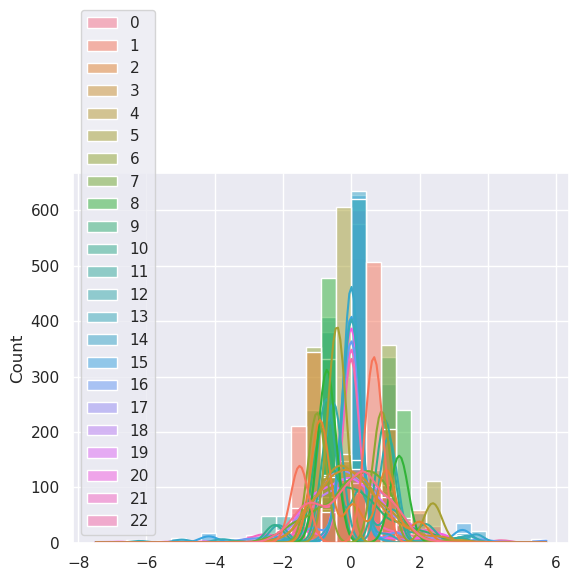

In [32]:
Scaler = StandardScaler().fit(X)
X_tr_scaled = Scaler.transform(X_tr)
X_val_scaled= Scaler.transform(X_val)
sns.histplot(X_tr_scaled,bins=30,kde=True)

## Model Selection 

In [33]:
# Import the neccesary libaries
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [34]:
def log_clf(X_trs=X_tr_scaled, y_trs=y_tr, X_vals=X_val_scaled, y_vals=y_val):
    log_reg = LogisticRegression()
    log_reg.fit(X_trs,y_trs)
    predictions = log_reg.predict(X_vals)
    predict_prob = log_reg.predict_proba(X_vals)[:,1]
    accuracy_scores = accuracy_score(y_vals,predictions)
    roc_score = roc_auc_score(y_vals,predict_prob)
    average_score = (accuracy_scores + roc_score) / 2
    return average_score

In [35]:
def Rlf_clf(X_trs=X_tr_scaled, y_trs=y_tr,X_vals=X_val_scaled, y_vals=y_val):
    rlf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
    rlf_clf.fit(X_trs,y_trs)
    predictions = rlf_clf.predict(X_vals)
    predict_prob = rlf_clf.predict_proba(X_vals)[:,1]
    accuracy_scores = accuracy_score(y_vals,predictions)
    roc_score = roc_auc_score(y_vals,predict_prob)
    average_score = (accuracy_scores + roc_score) / 2
    return average_score

In [36]:
def Tree_clf(X_trs=X_tr_scaled, y_trs=y_tr,X_vals=X_val_scaled, y_vals=y_val):
    Tree_clf = DecisionTreeClassifier(random_state=42)
    Tree_clf.fit(X_trs,y_trs)
    predictions = Tree_clf.predict(X_vals)
    predict_prob = Tree_clf.predict_proba(X_vals)[:,1]
    accuracy_scores = accuracy_score(y_vals,predictions)
    roc_score = roc_auc_score(y_vals,predict_prob)
    average_score = (accuracy_scores + roc_score) / 2
    return average_score

In [37]:
def SVC_clf(X_trs=X_tr_scaled, y_trs=y_tr,X_vals=X_val, y_vals=y_val):
    SVC_clf = SVC(probability=True, random_state=42)
    SVC_clf.fit(X_trs,y_trs)
    predictions = SVC_clf.predict(X_vals)
    predict_prob = SVC_clf.predict_proba(X_vals)[:,1]
    accuracy_scores = accuracy_score(y_vals,predictions)
    roc_score = roc_auc_score(y_vals,predict_prob)
    average_score = (accuracy_scores + roc_score) / 2
    return average_score

In [38]:
def main_accuracy():
    acc1 = log_clf()
    acc2 = Rlf_clf()
    acc3 = Tree_clf()
    acc4 = SVC_clf()
    accuracy_scores = {
        "Logistic Regression": acc1,
        "Random Forest": acc2,
        "Decision Tree": acc3,
        "SVC": acc4
    }
    best_classifier = max(accuracy_scores, key=accuracy_scores.get)
    best_accuracy = accuracy_scores[best_classifier]

    return best_classifier, best_accuracy



    

In [39]:
main_accuracy()

/usr/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


('Random Forest', 0.9902597402597403)